# Libraries and Data

In [33]:
# Mount Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# Path to the folder
%cd /content/drive/MyDrive/PYTHON TRAINING COLLAB/Introduction to Time Series Forecasting

/content/drive/MyDrive/PYTHON TRAINING COLLAB/Introduction to Time Series Forecasting


In [35]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
# Load bitcoin price data
# Open - price at the beginning of the day
# High - the highest price of the day
# Low - the lowest price of the day
# Close - price at the end of the day
# Adj Close - closing price of Bitcoin after accounting for any relevant factors (dividends, stock splits, new issuance, etc)
# Volume - total amount of Bitcoin traded during the day

df = pd.read_csv('bitcoin_price.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# Time Series Index

In [37]:
# Convert 'Date' To a Datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m-%d")
df.set_index('Date', inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [38]:
# Select the Bitcoin Data for 9 November 2021
df.loc['2021-11-09']

,2021-11-09
Open,6.754973e+04
High,6.853034e+04
Low,6.638206e+04
Close,6.697183e+04
Adj Close,6.697183e+04
Volume,4.235799e+10


In [39]:
# Another way to load the data and set the column 'Date' as index
df1 = pd.read_csv("bitcoin_price.csv", index_col = "Date", parse_dates = True)
df1.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='Date', length=3392, freq=None)

In [40]:
# Resampling to Weekly Frequency and calculate the mean values
df.resample('W').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-21,429.916998,437.718195,406.624402,416.859003,416.859003,3.138068e+07
2014-09-28,410.650718,418.668993,399.377141,407.692566,407.692566,2.668180e+07
2014-10-05,369.774288,376.721000,353.207140,361.426570,361.426570,3.952256e+07
2014-10-12,346.927429,363.308864,337.567858,355.234580,355.234580,4.873611e+07
2014-10-19,389.010284,397.790427,380.410575,390.479854,390.479854,2.241458e+07
...,...,...,...,...,...,...
2023-12-03,38038.414062,38743.479353,37766.444196,38399.994978,38399.994978,1.919430e+10
2023-12-10,43002.227121,44027.167411,42586.383929,43538.877232,43538.877232,2.692909e+10
2023-12-17,42369.368862,42969.940848,41148.103237,42020.472656,42020.472656,2.407050e+10


Resample offset aliases:
- B = business day
- D = calendar day
- W = weekly
- M = month end
- BM = business month end
- MS = month start
- BMS = business month start
- Q = quarter end
- BQ = business quarter end
- QS = quarter start
- BQS = business quarter start
- A = year end
- BA = business year end
- AS = year start
- BAS = business year start
- h = hourly
- min = minutely
- s = secondly
- ms = milliseconds
- us = microseconds

# Exploring Data

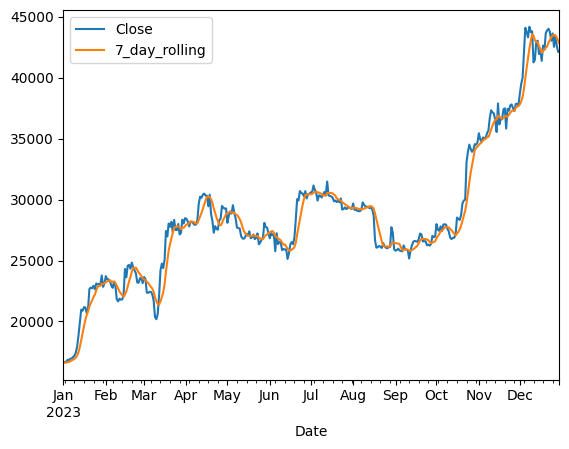

In [41]:
# Series.rolling() - create a rolling window calculation, to smooth time-series data and identify trends over time

# Create a new column for 7- Day rolling average of the closing price
df['7_day_rolling']= df['Close'].rolling(window = 7).mean()
# Plot both the rolling average and closing values
df[['Close', '7_day_rolling']].loc['2023'].plot()
plt.show()

In [42]:
# Series.idxmax() - To identify the index of the maximum value in a Series.
# Find out the month with highest closing average
df.resample('M').mean()['Close'].idxmax()

/tmp/ipython-input-350619226.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').mean()['Close'].idxmax()


Timestamp('2021-11-30 00:00:00')

In [43]:
# Series.pct_change() - calculate the percentage change from the previous row
# Create a new column for closing daily return (percentage change in the price from one day to the next)
df['daily_returns'] = df['Close'].pct_change() * 100

In [44]:
# Days with more than 10% change in closing price
df[abs(df['daily_returns']) > 10].head()

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling,daily_returns
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709


# Data Visualization

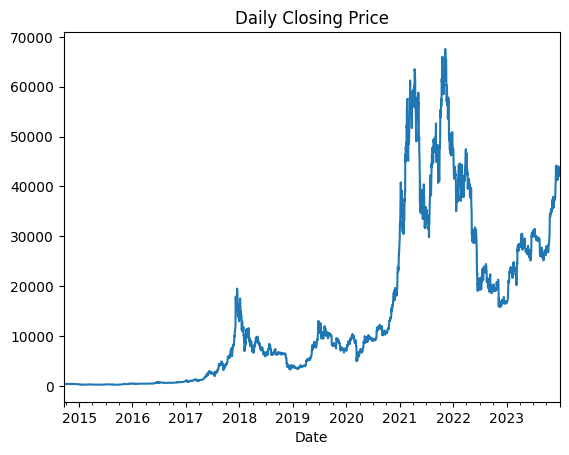

In [45]:
# Daily Closing Price Plot
df['Close'].plot(title = 'Daily Closing Price')
plt.show()

/tmp/ipython-input-2338301129.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample('Y').sum()['Volume'].plot()


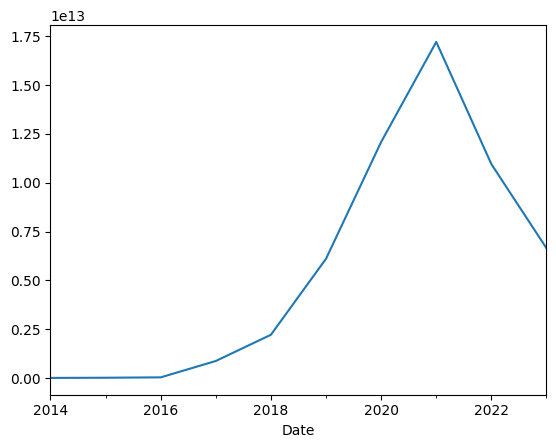

In [46]:
# Plot the Yearly Volume
df.resample('Y').sum()['Volume'].plot()
plt.show()

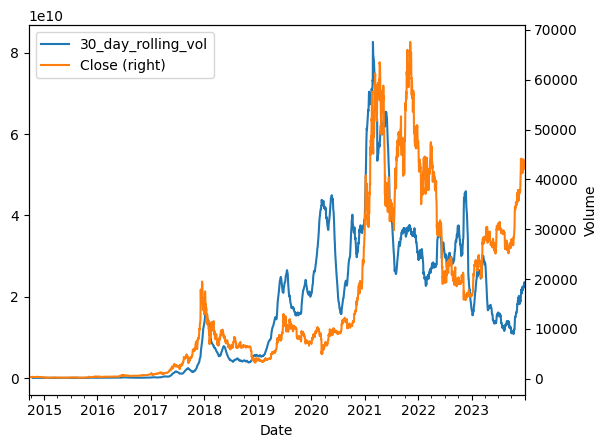

In [47]:
# Create a new column for 30- Day rolling average of the volume
df['30_day_rolling_vol'] = df['Volume'].rolling(window = 30).mean()

# Plotting Closing Price and 30-day rolling Volume
df['30_day_rolling_vol'].plot(legend = True)
ax = df['Close'].plot(secondary_y = True, legend = True)
ax.set_ylabel('Volume')
plt.show()

In [48]:
# There's a high correlation between the 30-day rolling Volume and the Closing Price
df[['Close', '30_day_rolling_vol']].corr()

,Close,30_day_rolling_vol
Close,1.000000,0.750445
30_day_rolling_vol,0.750445,1.000000


# Data Manipulation

In [49]:
# Identify missing values
df.isnull().sum()

# Fill Missing values
# method = 'bfill' - use next valid observation to fill gap.
df['30_day_rolling_vol'].fillna(method = 'bfill', inplace = True)

# Series.interpolate() - To estimate missing values based on the values around them.
# Interpolate missing 7 day rolling
df['7_day_rolling'].interpolate(inplace = True)

/tmp/ipython-input-4162392129.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['30_day_rolling_vol'].fillna(method = 'bfill', inplace = True)
/tmp/ipython-input-4162392129.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['7_day_rolling'].interpolate(inplace = True)


In [50]:
# Identify missing values
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
7_day_rolling,6
daily_returns,1
30_day_rolling_vol,0


In [51]:
# Extract Time Variables
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['weekday_numeric'] = df.index.weekday

# 5 & 6 is for Saturday and Sunday
df['is_weekend'] = df.index.weekday > 4

df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling,daily_returns,30_day_rolling_vol,year,month,day,weekday,weekday_numeric,is_weekend
Date,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,Wednesday,2,False
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,Thursday,3,False
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,Friday,4,False
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,Saturday,5,True
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,Sunday,6,True


In [52]:
## Feature Engineering - Lagged values

# Series.shift(1) - each value is moved to the row below its current position
# Purpose on stock price prediction: Using yesterday's price to help predict today's

# Create 2 new columns for lagged values 1 and 2
df['closed_lag1'] = df['Close'].shift(1)
df['closed_lag2'] = df['Close'].shift(2)

# Seasonality

/tmp/ipython-input-342815988.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['Close'].resample('M').mean(),


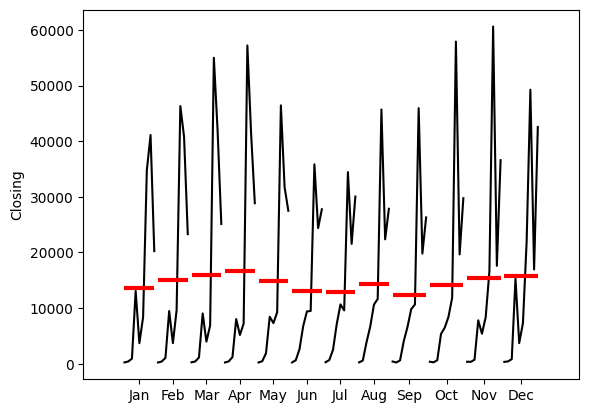

In [53]:
# month_plot() - To visualize the average value for each month across multiple years in a time series
# red lines - Represents the mean value for each month

# Plotting the monthly seasonality of closing values
month_plot(df['Close'].resample('M').mean(),
           ylabel = 'Closing')
plt.show()

/tmp/ipython-input-2011798107.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['Close'].resample('Q').mean(),


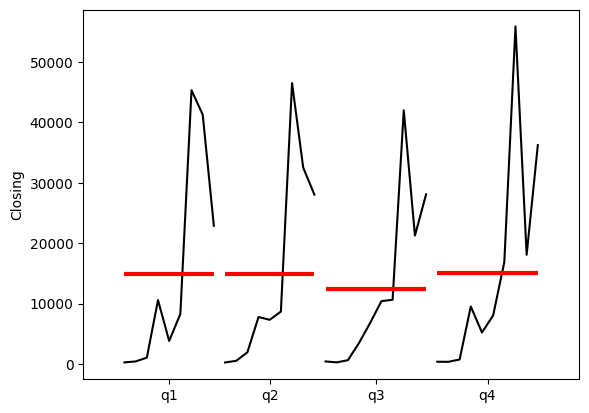

In [54]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of closing values
quarter_plot(df['Close'].resample('Q').mean(),
           ylabel = 'Closing')
plt.show()

In [55]:
# Load data of chocolate monthly revenue
df_choco = pd.read_csv("choco_monthly_revenue.csv", index_col = 0, parse_dates = True)
df_choco.head()

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461


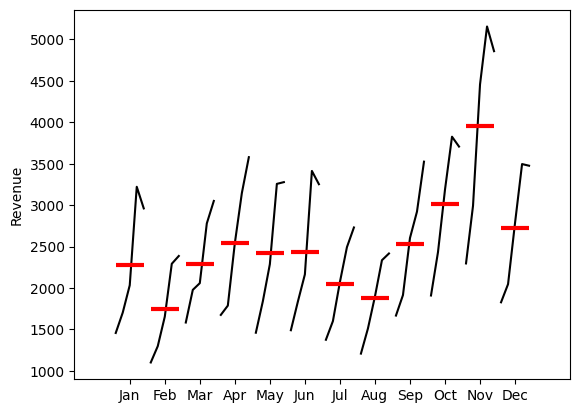

In [56]:
# Plotting the monthly seasonality of revenue
month_plot(df_choco['revenue'],
           ylabel = 'Revenue')
plt.show()

`seasonal_decompose` - To decompose a time series into its constituent parts to better understand the underlying patterns.

components

- Trend: The overall direction of the series (increasing, decreasing, or stable).
- Seasonal: Repeating patterns at fixed intervals (e.g., daily, weekly, monthly).
- Residual: The remaining variation after removing trend and seasonal components.

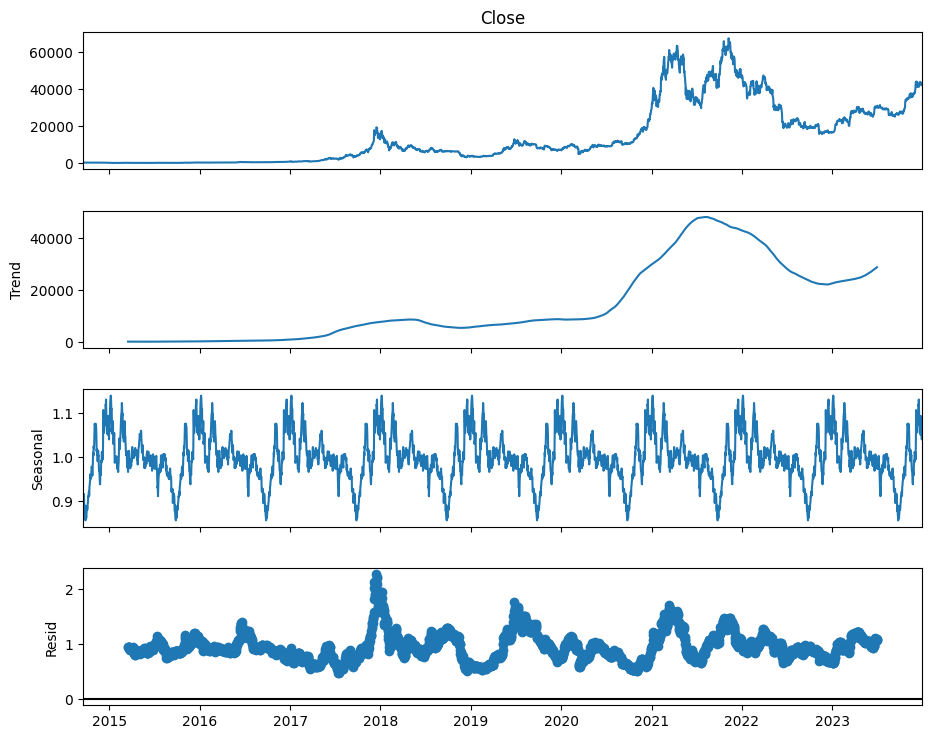

In [57]:
# Seasonal Decomposition Plots for Bitcoin Data
# Multiplicative model type, and daily (365) period
decomposition = seasonal_decompose(df['Close'],
                                   model = 'mul',
                                   period = 365)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

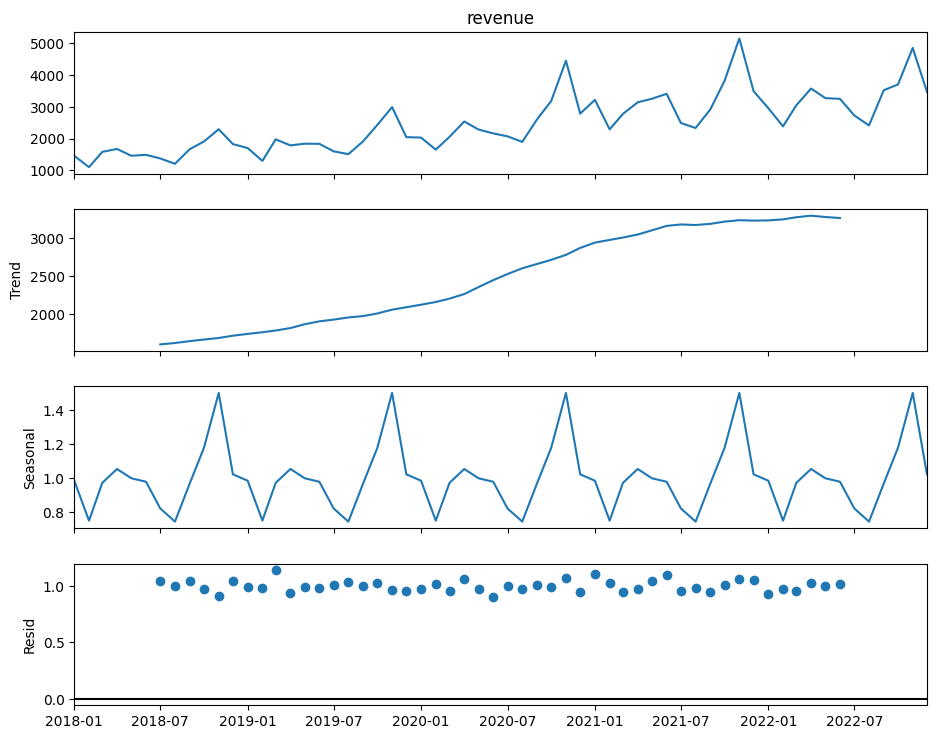

In [58]:
# Seasonal Decomposition Plots for Chocolate Revenue Data
# Multiplicative model type, and monthly (12) period
decomposition = seasonal_decompose(df_choco['revenue'],
                                   model = 'mul',
                                   period = 12)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

Seasonality:
* 24 for hourly
* 7 or 365 for daily, but 7 is preferred for modeling
* 52 for weekly
* 12 for monthly
* 4 for quarterly
* 5 for weekdays

# Auto-Correlation

Autocorrelation measures the correlation between a time series and a lagged version of itself.

Purpose: To identify patterns or repeating cycles in a time series dataset.

Interpretation:
- Values range from -1 to 1.
- 1 indicates perfect positive correlation.
- -1 indicates perfect negative correlation.
- 0 indicates no correlation.

ACF Plot:
- X-axis: Lag periods
- Y-axis: Correlation coefficient

Key Features:
- At lag 0, autocorrelation is always 1 (a series is perfectly correlated with itself).
- Significant spikes at certain lags indicate repeating patterns.




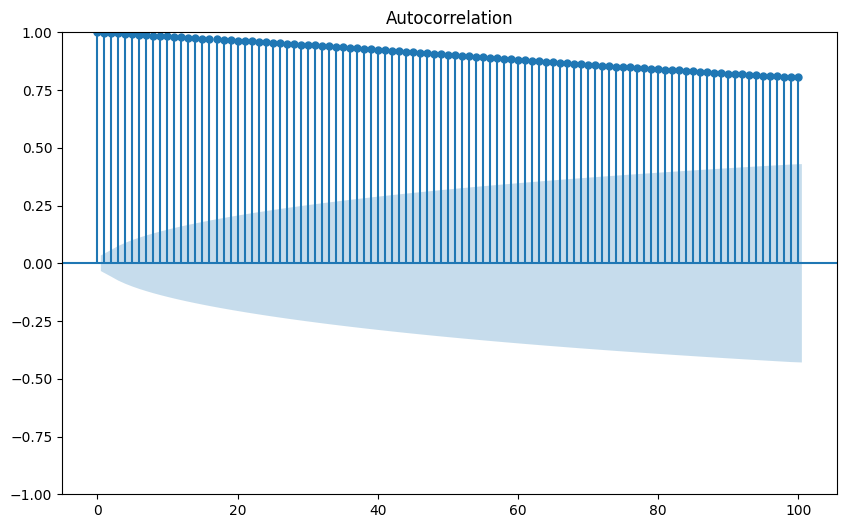

In [59]:
# Plot the autocorrelation (ACF) of the bitcoin closing values
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['Close'], lags = 100, ax = ax)
plt.show()

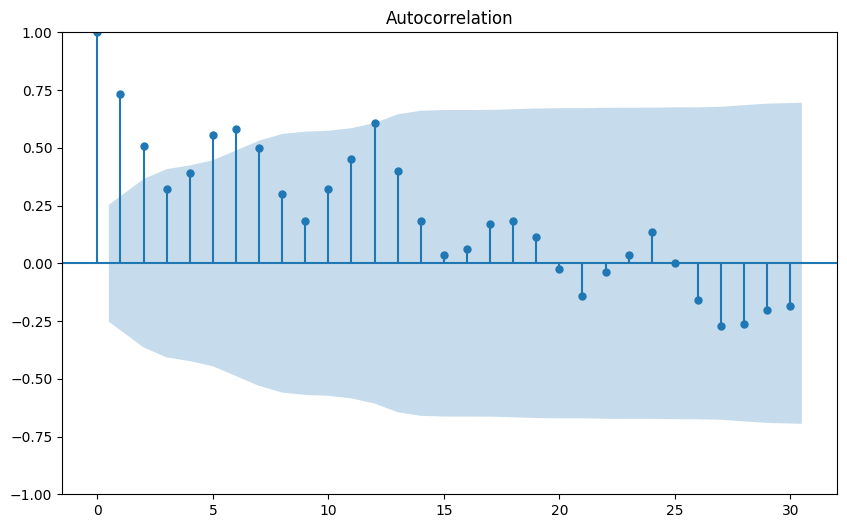

In [60]:
# Plot the autocorrelation (ACF) of the chocolate revenue values
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df_choco['revenue'], lags = 30, ax = ax)
plt.show()

# Partial Auto-correlation

PACF measures the correlation between a time series and its lag, after removing the effects of all shorter lags.

Purpose: To identify the direct relationship between an observation and its lag, without intermediate effects.

Main Difference between ACF and PACF:
- ACF: Measures overall correlation at each lag, including indirect effects.
- PACF: Measures direct correlation at each lag, excluding indirect effects.

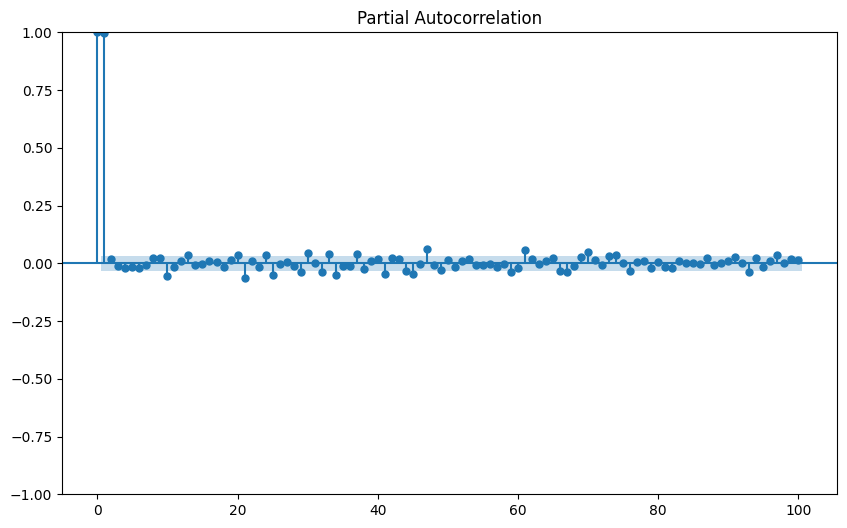

In [61]:
# Plot the partial autocorrelation (PACF) of the bitcoin closing values
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df['Close'], lags = 100, ax = ax)
plt.show()

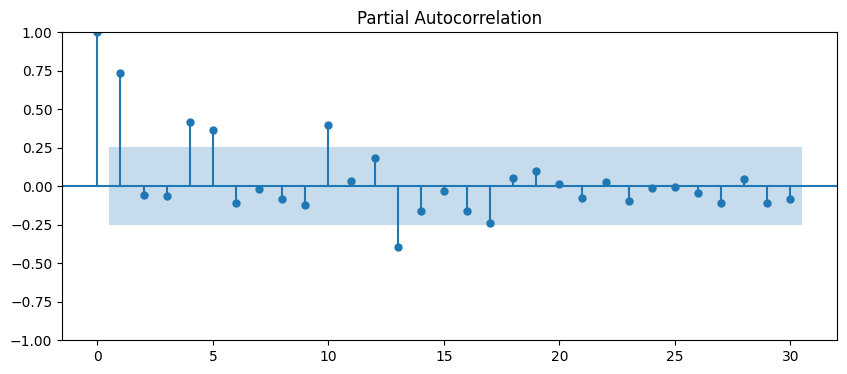

In [62]:
# Plot the partial autocorrelation (PACF) of the chocolate revenue values
fig, ax = plt.subplots(figsize = (10,4))
plot_pacf(df_choco['revenue'], lags = 30, ax = ax)
plt.show()